# Testing Model Regression

This notebook tests a electricity demand forecasting model for the Alameda campus, in specific the North Tower of IST

## 1 - Data Collection and Preparation

In [1]:
import pandas as pd # data science library to manipulate data
import numpy as np # mathematical library to manipulate arrays and matrices
import matplotlib.pyplot as mplt # visualization library
import seaborn as sb #visualization library specific for data science, based on matplotlib
from sklearn import metrics

In [2]:
df_2019_raw = pd.read_csv('testData_2019_NorthTower.csv') 
df_2019_raw

Date  North Tower (kWh)     temp_C         HR  \
0      2019-01-01 0:00:00             43.537  10.635833  62.684167   
1      2019-01-01 1:00:00             43.221  10.377500  62.836667   
2      2019-01-01 2:00:00             43.231  10.260833  61.720000   
3      2019-01-01 3:00:00             43.434   9.666667  63.893333   
4      2019-01-01 4:00:00             42.527   8.640833  68.034167   
...                   ...                ...        ...        ...   
2410  2019-04-11 11:00:00            251.734  15.615000  47.215000   
2411  2019-04-11 12:00:00            256.433  15.872500  46.630000   
2412  2019-04-11 13:00:00            259.927  16.315833  45.955833   
2413  2019-04-11 14:00:00            271.692  15.755455  45.820909   
2414  2019-04-11 15:00:00            257.742  15.290000  41.750000   

      windSpeed_m/s  windGust_m/s    pres_mbar  solarRad_W/m2  rain_mm/h  \
0               0.0           0.0  1031.000000       2.543250        0.0   
1               0.0           0.0  1031.000000       1.728667        0.0   
2               0.0           0.0  1031.083333       2.674750        0.0   
3               0.0           0.0  1031.083333       2.444250        0.0   
4               0.0           0.0  1031.000000       3.056333        0.0   
...             ...           ...          ...            ...        ...   
2410            0.0           0.0  1022.083333     869.200000        0.0   
2411            0.0           0.0  1022.000000     640.591667        0.0   
2412            0.0           0.0  1021.416667     855.808333        0.0   
2413            0.0           0.0  1021.090909     625.072727        0.0   
2414            0.0           0.0  1021.000000     519.750000        0.0   

      rain_day  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
2410       0.0  
2411       0.0  
2412       0.0  
2413       0.0  
2414       0.0  

[2415 rows x 10 columns]

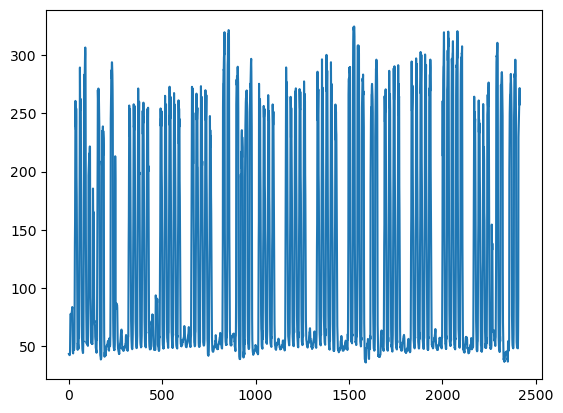

In [3]:
mplt.plot(df_2019_raw['North Tower (kWh)'])

In [4]:
df_2019_raw['Date']=pd.to_datetime(df_2019_raw['Date'])
df_2019=df_2019_raw.set_index(['Date'],drop=True)


In [5]:
df_2019

North Tower (kWh)     temp_C         HR  windSpeed_m/s  \
Date                                                                          
2019-01-01 00:00:00             43.537  10.635833  62.684167            0.0   
2019-01-01 01:00:00             43.221  10.377500  62.836667            0.0   
2019-01-01 02:00:00             43.231  10.260833  61.720000            0.0   
2019-01-01 03:00:00             43.434   9.666667  63.893333            0.0   
2019-01-01 04:00:00             42.527   8.640833  68.034167            0.0   
...                                ...        ...        ...            ...   
2019-04-11 11:00:00            251.734  15.615000  47.215000            0.0   
2019-04-11 12:00:00            256.433  15.872500  46.630000            0.0   
2019-04-11 13:00:00            259.927  16.315833  45.955833            0.0   
2019-04-11 14:00:00            271.692  15.755455  45.820909            0.0   
2019-04-11 15:00:00            257.742  15.290000  41.750000            0.0   

                     windGust_m/s    pres_mbar  solarRad_W/m2  rain_mm/h  \
Date                                                                       
2019-01-01 00:00:00           0.0  1031.000000       2.543250        0.0   
2019-01-01 01:00:00           0.0  1031.000000       1.728667        0.0   
2019-01-01 02:00:00           0.0  1031.083333       2.674750        0.0   
2019-01-01 03:00:00           0.0  1031.083333       2.444250        0.0   
2019-01-01 04:00:00           0.0  1031.000000       3.056333        0.0   
...                           ...          ...            ...        ...   
2019-04-11 11:00:00           0.0  1022.083333     869.200000        0.0   
2019-04-11 12:00:00           0.0  1022.000000     640.591667        0.0   
2019-04-11 13:00:00           0.0  1021.416667     855.808333        0.0   
2019-04-11 14:00:00           0.0  1021.090909     625.072727        0.0   
2019-04-11 15:00:00           0.0  1021.000000     519.750000        0.0   

                     rain_day  
Date                           
2019-01-01 00:00:00       0.0  
2019-01-01 01:00:00       0.0  
2019-01-01 02:00:00       0.0  
2019-01-01 03:00:00       0.0  
2019-01-01 04:00:00       0.0  
...                       ...  
2019-04-11 11:00:00       0.0  
2019-04-11 12:00:00       0.0  
2019-04-11 13:00:00       0.0  
2019-04-11 14:00:00       0.0  
2019-04-11 15:00:00       0.0  

[2415 rows x 9 columns]

In [6]:
df_2019 = df_2019.drop(['HR', 'windSpeed_m/s', 'windGust_m/s', 'pres_mbar', 'rain_mm/h','rain_day'], axis=1)

In [7]:
df_2019.rename(columns = {'temp_C': 'Temperature (ºC)','North Tower (kWh)': 'Power (kW)','solarRad_W/m2': 'SR (W/m2)'}, inplace = True)

In [8]:
df_2019

Power (kW)  Temperature (ºC)   SR (W/m2)
Date                                                         
2019-01-01 00:00:00      43.537         10.635833    2.543250
2019-01-01 01:00:00      43.221         10.377500    1.728667
2019-01-01 02:00:00      43.231         10.260833    2.674750
2019-01-01 03:00:00      43.434          9.666667    2.444250
2019-01-01 04:00:00      42.527          8.640833    3.056333
...                         ...               ...         ...
2019-04-11 11:00:00     251.734         15.615000  869.200000
2019-04-11 12:00:00     256.433         15.872500  640.591667
2019-04-11 13:00:00     259.927         16.315833  855.808333
2019-04-11 14:00:00     271.692         15.755455  625.072727
2019-04-11 15:00:00     257.742         15.290000  519.750000

[2415 rows x 3 columns]

In [9]:
df_19 = df_2019.drop(['Temperature (ºC)', 'SR (W/m2)'], axis=1)

In [10]:
df_2019['Power-1']=df_2019['Power (kW)'].shift(1) # Previous hour consumption
df_2019['Power-2']=df_2019['Power-1'].shift(1) # Second previous hour consumption
df_2019['Month'] = df_2019.index.month
df_2019['Hour'] = df_2019.index.hour
df_2019['Week Day'] = df_2019.index.weekday + 1
df_2019['Weekend'] = df_2019.index.weekday.isin([5, 6]).astype(int)

In [11]:
window_size = 3
df_2019['Power Mean'] = df_2019['Power (kW)'].rolling(window=window_size).mean()
df_2019['Power Diff Mean'] = df_2019['Power (kW)'] - df_2019['Power Mean']
df_2019.drop(columns=['Power Mean'], inplace=True)

In [12]:
import holidays

# Get the list of holidays in Portugal for the year of the dataset
pt_holidays = holidays.Portugal()

# Define a function to check if a date is a holiday in Portugal
def is_holiday(date):
    if date in pt_holidays:
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame to create a new column "Holiday"
df_2019['Holiday'] = df_2019.index.map(is_holiday)

In [13]:
df_2019 = df_2019.drop(['Week Day', 'Hour'], axis=1)
df_2019=df_2019.dropna()

In [14]:
df_2019

Power (kW)  Temperature (ºC)   SR (W/m2)  Power-1  \
Date                                                                     
2019-01-01 02:00:00      43.231         10.260833    2.674750   43.221   
2019-01-01 03:00:00      43.434          9.666667    2.444250   43.231   
2019-01-01 04:00:00      42.527          8.640833    3.056333   43.434   
2019-01-01 05:00:00      42.700          9.093333    2.426417   42.527   
2019-01-01 06:00:00      44.927          8.392500    2.467750   42.700   
...                         ...               ...         ...      ...   
2019-04-11 11:00:00     251.734         15.615000  869.200000  243.147   
2019-04-11 12:00:00     256.433         15.872500  640.591667  251.734   
2019-04-11 13:00:00     259.927         16.315833  855.808333  256.433   
2019-04-11 14:00:00     271.692         15.755455  625.072727  259.927   
2019-04-11 15:00:00     257.742         15.290000  519.750000  271.692   

                     Power-2  Month  Weekend  Power Diff Mean  Holiday  
Date                                                                    
2019-01-01 02:00:00   43.537      1        0        -0.098667        1  
2019-01-01 03:00:00   43.221      1        0         0.138667        1  
2019-01-01 04:00:00   43.231      1        0        -0.537000        1  
2019-01-01 05:00:00   43.434      1        0        -0.187000        1  
2019-01-01 06:00:00   42.527      1        0         1.542333        1  
...                      ...    ...      ...              ...      ...  
2019-04-11 11:00:00  236.157      4        0         8.054667        0  
2019-04-11 12:00:00  243.147      4        0         5.995000        0  
2019-04-11 13:00:00  251.734      4        0         3.895667        0  
2019-04-11 14:00:00  256.433      4        0         9.008000        0  
2019-04-11 15:00:00  259.927      4        0        -5.378333        0  

[2413 rows x 9 columns]

In [15]:
df_2019=df_2019.iloc[:, [0,3,4,7,1,2,6,5,8]]

In [16]:
df_2019

Power (kW)  Power-1  Power-2  Power Diff Mean  \
Date                                                                 
2019-01-01 02:00:00      43.231   43.221   43.537        -0.098667   
2019-01-01 03:00:00      43.434   43.231   43.221         0.138667   
2019-01-01 04:00:00      42.527   43.434   43.231        -0.537000   
2019-01-01 05:00:00      42.700   42.527   43.434        -0.187000   
2019-01-01 06:00:00      44.927   42.700   42.527         1.542333   
...                         ...      ...      ...              ...   
2019-04-11 11:00:00     251.734  243.147  236.157         8.054667   
2019-04-11 12:00:00     256.433  251.734  243.147         5.995000   
2019-04-11 13:00:00     259.927  256.433  251.734         3.895667   
2019-04-11 14:00:00     271.692  259.927  256.433         9.008000   
2019-04-11 15:00:00     257.742  271.692  259.927        -5.378333   

                     Temperature (ºC)   SR (W/m2)  Weekend  Month  Holiday  
Date                                                                        
2019-01-01 02:00:00         10.260833    2.674750        0      1        1  
2019-01-01 03:00:00          9.666667    2.444250        0      1        1  
2019-01-01 04:00:00          8.640833    3.056333        0      1        1  
2019-01-01 05:00:00          9.093333    2.426417        0      1        1  
2019-01-01 06:00:00          8.392500    2.467750        0      1        1  
...                               ...         ...      ...    ...      ...  
2019-04-11 11:00:00         15.615000  869.200000        0      4        0  
2019-04-11 12:00:00         15.872500  640.591667        0      4        0  
2019-04-11 13:00:00         16.315833  855.808333        0      4        0  
2019-04-11 14:00:00         15.755455  625.072727        0      4        0  
2019-04-11 15:00:00         15.290000  519.750000        0      4        0  

[2413 rows x 9 columns]

## 2 - Test Model

In [17]:
import pickle

In [18]:
#Load LR model
with open('LR_model.pkl','rb') as file:
    LR_model=pickle.load(file)

In [19]:
Z=df_2019.values
Y=Z[:,0]
X2=Z[:,[1,2,3,4,5,6,7,8]]

In [20]:
Y

array([ 43.231,  43.434,  42.527, ..., 259.927, 271.692, 257.742])

In [21]:
LR_model

LinearRegression()

In [22]:
y_pred_LR = LR_model.predict(X2)

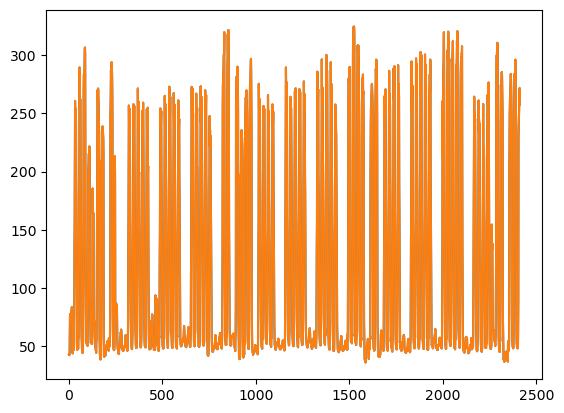

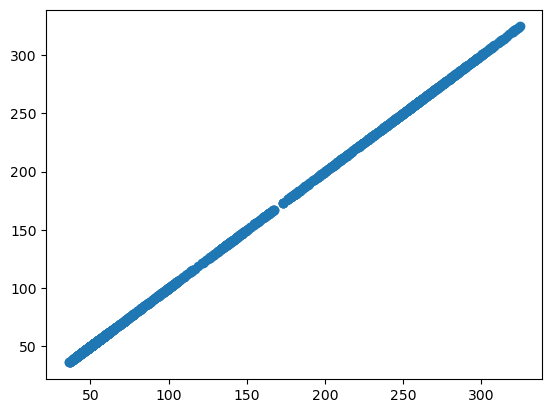

In [23]:
mplt.plot(Y)
mplt.plot(y_pred_LR)
mplt.show()
mplt.scatter(Y,y_pred_LR)

**Evaluating the model error**

In [24]:
MAE_LR=metrics.mean_absolute_error(Y,y_pred_LR) 
MBE_LR=np.mean(Y- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(Y,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(Y,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(Y)
NMBE_LR=MBE_LR/np.mean(Y)

print(MAE_LR, MBE_LR,MSE_LR, RMSE_LR,cvRMSE_LR,NMBE_LR)

4.863374978787325e-14 1.699059919326887e-14 4.069975658659638e-27 6.379636085749436e-14 5.324104961569426e-16 1.4179450402662538e-16


In [25]:
# define the table headers
headers = ["Hourly Criteria", "ASHRAE Guideline 14", "IPMVP", "Model"]

# define the table rows
rows = [
    ["NMBE", "+-10%", "+-5%", "{:.2%}".format(NMBE_LR)],
    ["CV(RMSE)", "30%", "20%", "{:.2%}".format(cvRMSE_LR)],
]

# calculate the maximum length of each column
max_lengths = [max(len(item) for item in col) for col in zip(headers, *rows)]

# print the table headers
for i, header in enumerate(headers):
    print(f"{header:<{max_lengths[i]}}", end="  ")

# print a separator line
print("\n" + "-" * (sum(max_lengths) + len(headers) * 2 - 1))

# print the table rows
for row in rows:
    for i, item in enumerate(row):
        print(f"{item:<{max_lengths[i]}}", end="  ")
    print("")

Hourly Criteria  ASHRAE Guideline 14  IPMVP  Model  
---------------------------------------------------
NMBE             +-10%                +-5%   0.00%  
CV(RMSE)         30%                  20%    0.00%  
